In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from src.record import Record
import matplotlib.ticker as ticker

sns.set(font_scale=1.2)
sns.set_theme(style="whitegrid", palette='deep')

def smooth(df, vals):
    for val in vals:
        smoothed = df[val].rolling(20000, min_periods = 1).mean()
        df.loc[smoothed.index, val] = smoothed

In [3]:
models = {
    'bestfit': 'Best Fit',
    'firstfit': 'First Fit',
    'caviglione': 'Caviglione',
    'convex': 'Convex',
    'ppo': 'PPO',
}

df = pd.DataFrame()
for i in np.arange(0, 8, 1, dtype=int):
    for agent in models.keys():
        f = open(f'data/exp_performance/load1.00/{agent}-{i}.json')
        jsonstr = json.load(f)
        record = Record.import_record(agent, jsonstr)
        sample = pd.DataFrame({'Reward': record.rewards, 'CPU Utilisation Mean': np.mean(record.cpu, axis=1), 'CPU Utilisation Variance': np.var(record.cpu, axis=1), 'Memory Utilisation Mean': np.mean(record.cpu, axis=1), 'Memory Utilisation Variance': np.var(record.cpu, axis=1), 'Waiting Ratio': record.waiting_ratio})
        smooth(sample, ['CPU Utilisation Mean', 'CPU Utilisation Variance', 'Memory Utilisation Mean', 'Memory Utilisation Variance', 'Waiting Ratio'])
        sample['Agent'] = models[agent]
        sample['Step'] = sample.index + 1
        df = pd.concat([df, sample])

df = df.reset_index(drop=True)

High load CPU Utilisation mean line graph:

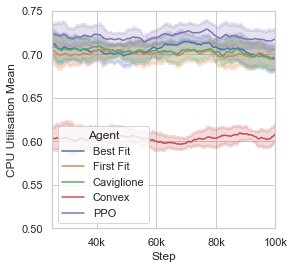

In [9]:
plt.subplots(figsize=(4,4))
g = sns.lineplot(x="Step", y="CPU Utilisation Mean", hue='Agent', data=df)
g.set(xlim=(25000, 100000))
g.set(ylim=(0.55, 0.75))
# Custom x-axis tick formatter
def step_formatter(x, pos):
    return f'{int(x/1000)}k'

g.xaxis.set_major_formatter(ticker.FuncFormatter(step_formatter))

plt.savefig('plots/cpu_mean_line.pdf', bbox_inches='tight', pad_inches=0.25)


High load CPU Utilisation std line graph:

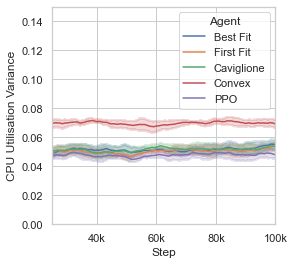

In [10]:
plt.subplots(figsize=(4,4))
g = sns.lineplot(x="Step", y="CPU Utilisation Variance", hue='Agent', data=df)
g.set(xlim=(25000, 100000))
g.set(ylim=(0.02, 0.15))

# Custom x-axis tick formatter
def step_formatter(x, pos):
    return f'{int(x/1000)}k'

g.xaxis.set_major_formatter(ticker.FuncFormatter(step_formatter))

plt.savefig('plots/cpu_var_line.pdf', bbox_inches='tight', pad_inches=0.25)


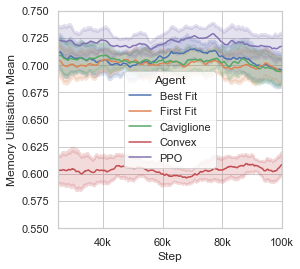

In [11]:
plt.subplots(figsize=(4,4))
g = sns.lineplot(x="Step", y="Memory Utilisation Mean", hue='Agent', data=df)
g.set(xlim=(25000, 100000))
g.set(ylim=(0.55, 0.575))
# Custom x-axis tick formatter
def step_formatter(x, pos):
    return f'{int(x/1000)}k'

g.xaxis.set_major_formatter(ticker.FuncFormatter(step_formatter))

plt.savefig('plots/memory_mean_line.pdf', bbox_inches='tight', pad_inches=0.25)

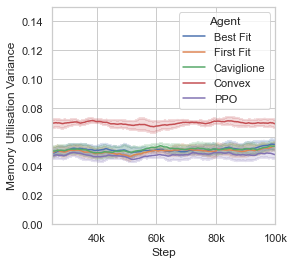

In [12]:
plt.subplots(figsize=(4,4))
g = sns.lineplot(x="Step", y="Memory Utilisation Variance", hue='Agent', data=df)
g.set(xlim=(25000, 100000))
g.set(ylim=(0.02, 0.15))

# Custom x-axis tick formatter
def step_formatter(x, pos):
    return f'{int(x/1000)}k'

g.xaxis.set_major_formatter(ticker.FuncFormatter(step_formatter))

plt.savefig('plots/memory_var_line.pdf', bbox_inches='tight', pad_inches=0.25)

High load served VMs:

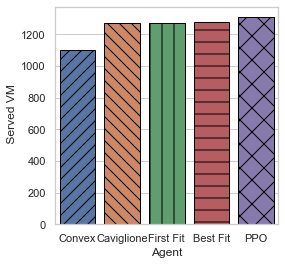

In [19]:
models = {
    'bestfit': 'Best Fit',
    'firstfit': 'First Fit',
    'caviglione': 'Caviglione',
    'convex': 'Convex',
    'ppo': 'PPO',
}

plt.subplots(figsize=(4,4))
df = pd.read_csv('data/exp_performance/summary.csv')
for key in models.keys():
    df.replace(key, models[key], inplace=True)
df = df[(df['Agent'].isin(models.values())) & (df[' Load'] == 1.0)]

g = sns.barplot(x="Agent", y=" Served VM",linewidth=1, edgecolor="0", order=['Convex', 'Caviglione', 'First Fit', 'Best Fit', 'PPO'], data=df)
hatches = ["//", "\\\\", "|", "-", "x"]
for i, thisbar in enumerate(g.patches):
    thisbar.set_hatch(hatches[i])

plt.savefig('plots/served_bar.pdf', bbox_inches='tight', pad_inches=0.25)

High load drop rate:

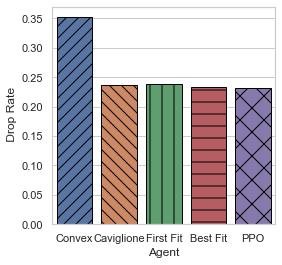

In [20]:
plt.subplots(figsize=(4,4))
g = sns.barplot(x="Agent", y=" Drop Rate",linewidth=1, edgecolor="0", order=['Convex', 'Caviglione', 'First Fit', 'Best Fit', 'PPO'], data=df)
hatches = ["//", "\\\\", "|", "-", "x"]
for i, thisbar in enumerate(g.patches):
    thisbar.set_hatch(hatches[i])
plt.savefig('plots/drop_bar.pdf', bbox_inches='tight', pad_inches=0.25)

High load waiting ratio: 

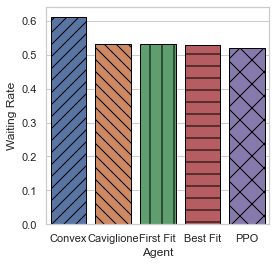

In [21]:
plt.subplots(figsize=(4,4))
g = sns.barplot(x="Agent", y=" Waiting Ratio",linewidth=1, edgecolor="0", order=['Convex', 'Caviglione', 'First Fit', 'Best Fit', 'PPO'], data=df)
g.set(ylabel='Waiting Rate')
hatches = ["//", "\\\\", "|", "-", "x"]
for i, thisbar in enumerate(g.patches):
    thisbar.set_hatch(hatches[i])
plt.savefig('plots/waiting_bar.pdf', bbox_inches='tight', pad_inches=0.25)

Load vs total served: 

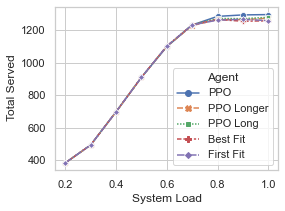

In [9]:
df = pd.read_csv('data/exp_suspension/data.csv')
df['System Load'] = df[' Load']
models = {
    'bestfit': 'Best Fit',
    'firstfit': 'First Fit',
    'caviglione': 'Caviglione',
    'convex': 'Convex',
    'ppo-kl': 'PPO',
    'ppo-long-kl': 'PPO Long',
    'ppo-longer-kl': 'PPO Longer'
}
for key in models.keys():
    df.replace(key, models[key], inplace=True)
loads = df[(df[' Service Length'] == 1000) & (df['Agent'].isin(models.values()))].drop_duplicates()
loads['Suspend Action Ratio'] = loads[' Valid Suspend Actions'] / loads[' Life']
loads['Suspensions per VM'] = loads[' Valid Suspend Actions'] / loads[' Total Served']

plt.subplots(figsize=(4,3))
sns.lineplot(x="System Load", y=" Total Served", markers=True, dashes=True, style='Agent', hue='Agent', data=loads)
plt.savefig('plots/load_served_line.pdf', bbox_inches='tight', pad_inches=0.25)

Load vs Suspensions per vm:

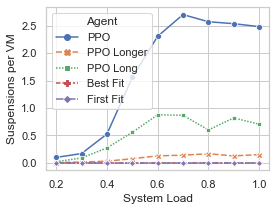

In [10]:
plt.subplots(figsize=(4,3)) 
sns.lineplot(x="System Load", y="Suspensions per VM", markers=True, dashes=True, style='Agent', hue='Agent', data=loads)
plt.savefig('plots/load_suspend_per_vm_line.pdf', bbox_inches='tight', pad_inches=0.25)

Load vs pending:

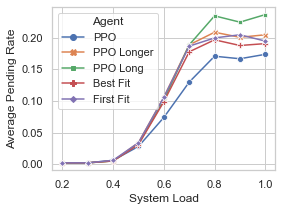

In [11]:
plt.subplots(figsize=(4,3)) 
loads = df[(df[' Service Length'] == 1000) & (df['Agent'].isin(models.values()))].drop_duplicates()
g = sns.lineplot(x="System Load", y=" Average Pending", markers=True, dashes=False, style='Agent', hue='Agent', data=loads)
g.set(ylabel='Average Pending Rate')
plt.savefig('plots/load_pending_line.pdf', bbox_inches='tight', pad_inches=0.25)

Load vs slowdown:

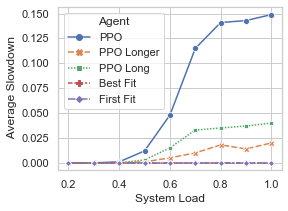

In [12]:
plt.subplots(figsize=(4,3)) 
sns.lineplot(x="System Load", y=" Average Slowdown", markers=True, dashes=True, style='Agent', hue='Agent', data=loads)
g.set(ylabel='Average Slowdown Rate')
g.set(ylim=(0, 0.1))
plt.savefig('plots/load_slowdown_line.pdf', bbox_inches='tight', pad_inches=0.25)

Service Length vs total served:

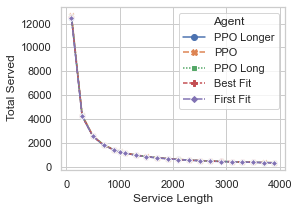

In [13]:
servrates = df[(df[' Load'] == 1) & (df['Agent'].isin(models.values()))].drop_duplicates()
servrates['Suspend Action Ratio'] = servrates[' Valid Suspend Actions'] / servrates[' Life']
servrates['Suspensions per VM'] = servrates[' Valid Suspend Actions'] / servrates[' Total Served']
servrates['Service Length'] = servrates[' Service Length']
plt.subplots(figsize=(4,3)) 
sns.lineplot(x="Service Length", y=" Total Served", markers=True, dashes=True, style='Agent', hue='Agent', data=servrates)
plt.savefig('plots/service_length_served_line.pdf', bbox_inches='tight', pad_inches=0.25)

Service length vs suspend action ratio: 

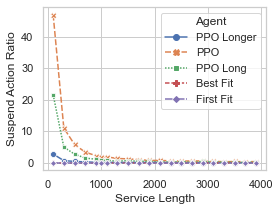

In [14]:
plt.subplots(figsize=(4,3)) 
sns.lineplot(x="Service Length", y="Suspend Action Ratio", markers=True, dashes=True, style='Agent', hue='Agent', data=servrates)
plt.savefig('plots/service_length_suspend_ratio_line.pdf', bbox_inches='tight', pad_inches=0.25)

Service length vs suspend action ratio: 

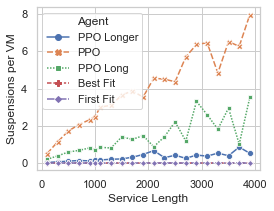

In [15]:
plt.subplots(figsize=(4,3)) 
g = sns.lineplot(x="Service Length", y="Suspensions per VM", markers=True, dashes=True, hue='Agent', style='Agent', data=servrates)
plt.savefig('plots/service_length_suspend_per_vm_line.pdf', bbox_inches='tight', pad_inches=0.25)

Service length vs pending:

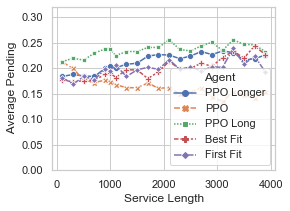

In [16]:
plt.subplots(figsize=(4,3)) 
g = sns.lineplot(x="Service Length", y=" Average Pending", markers=True, dashes=True, style='Agent', hue='Agent', data=servrates)
g.set(ylim=(0, 0.32))
plt.savefig('plots/service_length_pending_line.pdf', bbox_inches='tight', pad_inches=0.25)

Service length vs slowdown:

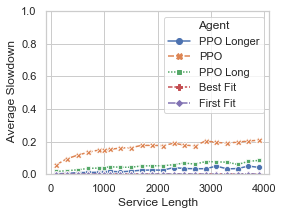

In [17]:
plt.subplots(figsize=(4,3)) 
g = sns.lineplot(x="Service Length", y=" Average Slowdown", markers=True, dashes=True, style='Agent', hue='Agent', data=servrates)
g.set(ylim=(0, 1))
plt.savefig('plots/service_length_slowdown_line.pdf', bbox_inches='tight', pad_inches=0.25)

Slowdown rate distribution

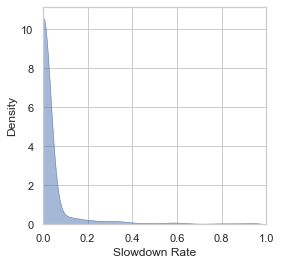

: 

In [20]:
f = open(f'data/exp_performance/load1.00/ppo-long-0.json')
jsonstr = json.load(f)
record = Record.import_record('PPO', jsonstr)
slowdowns = np.array(record.slowdown_rates)
plt.figure(figsize=(4, 4))
g = sns.kdeplot(data=slowdowns, fill=True, common_norm=False, alpha=0.5, linewidth=0.5)
g.set(ylabel='Density')
g.set(xlabel='Slowdown Rate')
g.set(xlim=(0, 1))
plt.savefig('plots/slowdown_kde.pdf', bbox_inches='tight', pad_inches=0.25)

In [32]:
# Extract from tensorboard log
try: 
    df = pd.read_csv('data/exp_training/ppo-kl.csv')
    df['Value'] = df['Value'].rolling(1000, min_periods = 100).mean()
    df.reset_index(inplace=True)

    plt.subplots(figsize=(4,3))
    g = sns.lineplot(x=df['Step']*500, y=df['Value'])

    g.set(ylabel='PPO Episodic Return')
    g.set(xlabel='Training Step')
    g.set_xticklabels(['', '0', '20K', '40K', '60K', '80K', '100K'])

    plt.savefig('plots/ppo-return.pdf', bbox_inches='tight', pad_inches=0.25)
except: 
    print("Extract the ep_return from tensorboard log and save it as data/exp_training/ppo-kl.csv")

Extract the ep_return from tensorboard log and save it as data/exp_training/ppo-r3.csv


In [33]:
# Extract from tensorboard log
try: 
    df = pd.read_csv('data/exp_training/caviglione-kl.csv')
    df['Value'] = df['Value'].rolling(1000, min_periods = 100).mean()
    df.reset_index(inplace=True)

    plt.subplots(figsize=(4,3))
    g = sns.lineplot(x=df['Step']*500, y=df['Value'])
    g.set(ylabel='DQN Episodic Return')
    g.set(xlabel='Training Step')
    g.set_xticklabels(['', '0', '20K', '40K', '60K', '80K', '100K'])
    plt.savefig('plots/dqn-return.pdf', bbox_inches='tight', pad_inches=0.25)
except:
    print("Extract the ep_return from tensorboard log and save it as data/exp_training/caviglione-kl.csv")

Extract the ep_return from tensorboard log and save it as data/exp_training/caviglione-r3.csv


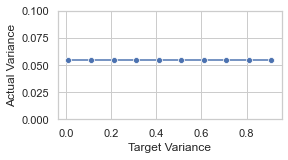

In [34]:
means = []
vars = []
targets = np.around(np.arange(0.01, 1, 0.1), decimals=2)
for i in targets:
    f = open(f'data/exp_var/{i:.2f}.json')
    jsonstr = json.load(f)
    record = Record.import_record('PPO', jsonstr)
    utils = record.cpu
    utils = np.array(utils)
    mean = np.mean(utils)
    var = np.var(utils)
    means.append(mean)
    vars.append(var)

plt.subplots(figsize=(4,2))
g = sns.lineplot(x=targets, y=vars, marker='o')
g.set(ylabel='Actual Variance')
g.set(xlabel='Target Variance')
g.set(ylim=(0, 0.1))
plt.savefig('plots/sd_sd.pdf', bbox_inches='tight')

Sample broken graph:

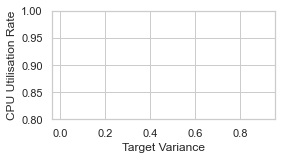

In [35]:
plt.subplots(figsize=(4,2))
g = sns.lineplot(x=targets, y=means, marker='o')
g.set(ylabel='CPU Utilisation Rate')
g.set(xlabel='Target Variance')
g.set(ylim=(0.8, 1))
plt.savefig('plots/sd_mean.pdf', bbox_inches='tight')

In [2]:
df = pd.DataFrame()
for i in np.arange(0, 1, 0.1):
    f = open(f'data/exp_beta/{i:.1f}.json')
    jsonstr = json.load(f)
    record = Record.import_record("ppo", jsonstr)
    sample = pd.DataFrame({'Beta': record.env_config["beta"], 'CPU Utilisation Mean': np.mean(record.cpu, axis=1), 'CPU Utilisation Variance': np.var(record.cpu, axis=1), 'VMs Served': record.served_requests})
    smooth(sample, ['CPU Utilisation Mean', 'CPU Utilisation Variance', 'VMs Served'])
    sample['Step'] = sample.index + 1
    df = pd.concat([df, sample])

df = df.reset_index(drop=True)

plt.figure(figsize=(6, 6))
sns.barplot(x='Beta', y='VMs Served', data=df, ci=None)
plt.title('Beta vs VMs Served')
plt.show()

KeyError: 'agent_config'

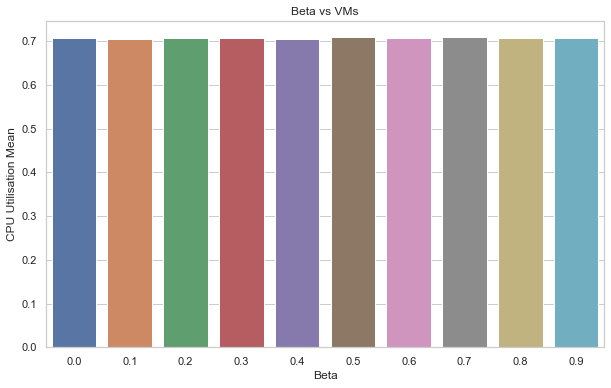

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Beta', y='CPU Utilisation Mean', data=df, ci=None)
plt.title('Beta vs VMs')
plt.show()